In [543]:
import pandas as pd
import numpy as np
import math
import json
from matplotlib import pyplot as plt
%matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

## Describing columns for each files

In [475]:
#print('------ PORTFOLIO --------')
#print(portfolio.describe(include='all'))
#print('------  PROFILE  --------')
#print(profile.describe(include='all'))
#print('------ TRANSCRIPT -------')
#print(transcript.describe(include='all') )

### Portfolio dataset description 
|        | reward    | channels                     | difficulty | duration  | offer_type | id                               |
|--------|-----------|------------------------------|------------|-----------|------------|----------------------------------|
| count  | 10.0 | 10                           | 10.000000  | 10.000000 | 10         | 10                               |
| unique | NaN       | 4                            | NaN        | NaN       | 3          | 10                               |
| top    | NaN       | [web, email, mobile, social] | NaN        | NaN       | bogo       | 0b1e1539f2cc45b7b9fa7c272da2e1d7 |
| freq   | NaN       | 4                            | NaN        | NaN       | 4          | 1                                |
| mean   | 4.2  | NaN                          | 7.700000   | 6.500000  | NaN        | NaN                              |
| std    | 3.58  | NaN                          | 5.831905   | 2.321398  | NaN        | NaN                              |
| min    | 0.0  | NaN                          | 0.000000   | 3.000000  | NaN        | NaN                              |
| 25%    | 2.0  | NaN                          | 5.000000   | 5.000000  | NaN        | NaN                              |
| 50%    | 4.0  | NaN                          | 8.500000   | 7.000000  | NaN        | NaN                              |
| 75%    | 5.0  | NaN                          | 10.000000  | 7.000000  | NaN        | NaN                              |
| max    | 10.0 | NaN                          | 20.000000  | 10.000000 | NaN        | NaN                              |

### Profile dataset description 
|        | gender | age          | id                               | became_member_on | income        |
|--------|--------|--------------|----------------------------------|------------------|---------------|
| count  | 14825  | 17000 | 17000                            | 1.700000e+04     | 14825.0  |
| unique | 3      | NaN          | 17000                            | NaN              | NaN           |
| top    | M      | NaN          | 033d0a511a5c452ea2be37a23f8c6dcb | NaN              | NaN           |
| freq   | 8484   | NaN          | 1                                | NaN              | NaN           |
| mean   | NaN    | 62.5    | NaN                              | 2.016703e+07     | 65404.9  |
| std    | NaN    | 26.7    | NaN                              | 1.167750e+04     | 21598.2|
| min    | NaN    | 18    | NaN                              | 2.013073e+07     | 30000.0  |
| 25%    | NaN    | 45   | NaN                              | 2.016053e+07     | 49000.0  |
| 50%    | NaN    | 58   | NaN                              | 2.017080e+07     | 64000.0 |
| 75%    | NaN    | 73    | NaN                              | 2.017123e+07     | 80000.0  |
| max    | NaN    | 118  | NaN                              | 2.018073e+07     | 120000.0 |

### Transcript dataset description 

|        | person                           | event       | value                                            | time          |
|--------|----------------------------------|-------------|--------------------------------------------------|---------------|
| count  | 306534                           | 306534      | 306534                                           | 306534.0 |
| unique | 17000                            | 4           | 5121                                             | NaN           |
| top    | 94de646f7b6041228ca7dec82adb97d2 | transaction | {'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'} | NaN           |
| freq   | 51                               | 138953      | 14983                                            | NaN           |
| mean   | NaN                              | NaN         | NaN                                              | 366.3    |
| std    | NaN                              | NaN         | NaN                                              | 200.3    |
| min    | NaN                              | NaN         | NaN                                              | 0.0      |
| 25%    | NaN                              | NaN         | NaN                                              | 186.0    |
| 50%    | NaN                              | NaN         | NaN                                              | 408.0    |
| 75%    | NaN                              | NaN         | NaN                                              | 528.0    |
| max    | NaN                              | NaN         | NaN                                              | 714.0    |

## Merging datasets

### Changing IDs nomas from portfolio and profile more descriptives

In [544]:
portfolio = portfolio.rename(columns={"id": "portfolio_id"})
profile = profile.rename(columns={"id": "profile_id"}) 
#Change transcript time to days
transcript['days'] = transcript['time'].apply(lambda x: x/24.0)

### Get data from value column on transcript file

In [545]:
transcript['offer_id'] = transcript['value'].apply(lambda x: x.get('offer id'))
transcript['amount'] = transcript['value'].apply(lambda x: x.get('amount'))
transcript = transcript.drop(columns = ['value'])

### Merge files in one dataframe

In [546]:
transcript = transcript.merge(profile, left_on='person', right_on='profile_id', how='left')
transcript = transcript.drop(columns=['profile_id'])
transcript = transcript.merge(portfolio, left_on='offer_id', right_on='portfolio_id', how='left')
transcript = transcript.drop(columns=['portfolio_id'])

In [547]:
transcript.head()

,person,event,time,days,offer_id,amount,gender,age,became_member_on,income,reward,channels,difficulty,duration,offer_type
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,20170509,100000.0,5.0,"[web, email, mobile]",5.0,7.0,bogo
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,None,118,20170804,NaN,5.0,"[web, email]",20.0,10.0,discount
2,e2127556f4f64592b11af22de27a7932,offer received,0,0.0,2906b810c7d4411798c6938adc9daaa5,NaN,M,68,20180426,70000.0,2.0,"[web, email, mobile]",10.0,7.0,discount
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,0.0,fafdcd668e3743c1bb461111dcafc2a4,NaN,None,118,20170925,NaN,2.0,"[web, email, mobile, social]",10.0,10.0,discount
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,None,118,20171002,NaN,10.0,"[web, email, mobile, social]",10.0,5.0,bogo


## General analysis of some variables

### Getting Offers types and counting events

How many offers Starbucks gave to their customers and which types of events how many of it we can get in the behavior of all the customers.

In [548]:
print('Unique values in column "offer_type" of Portfolilio')
print(portfolio.offer_type.unique())
print('\nUnique values in column "event" of Transcript')
print(transcript.groupby(['event']).count()['person'])

Unique values in column "offer_type" of Portfolilio
['bogo' 'informational' 'discount']

Unique values in column "event" of Transcript
event
offer completed     33579
offer received      76277
offer viewed        57725
transaction        138953
Name: person, dtype: int64


### Histograms

Text(0.5, 1.0, 'Age Histogram')

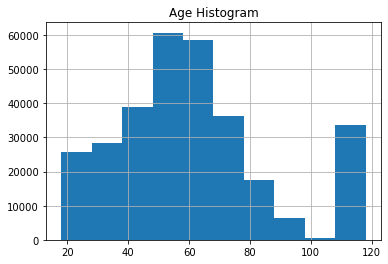

In [549]:
transcript['age'].hist()
plt.title('Age Histogram')

In the **age** column there is some value **above 100**, these values can be trated like an abnormalitie. Later we could give a special value, something appropiate to the model.

Text(0.5, 1.0, 'Income Histogram')

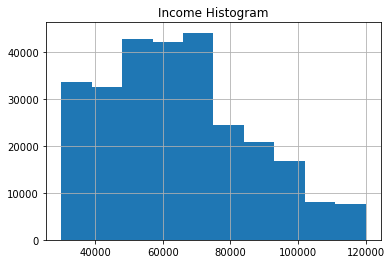

In [550]:
transcript['income'].hist()
plt.title('Income Histogram')

Text(0.5, 1.0, 'Become Member Age - Histogram')

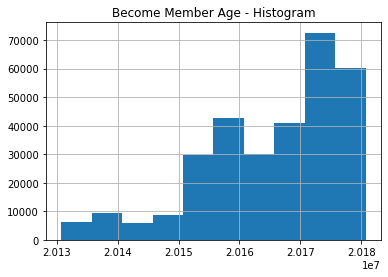

In [551]:
transcript['became_member_on'].hist()
plt.title('Become Member Age - Histogram')

In [552]:
#Order transcript by person and days
transcript = transcript.sort_values(['person', 'days'], ascending=[True, True], ignore_index=True)
#Add new column: If the offer completed has been viewed by the client then is a influenced_offer = 1, otherwise = 0
transcript['sum_amount'] = 0.0 
transcript['offer_index_received'] = ''
transcript['offer_is_completed'] = 0
transcript['amount_when_completed'] = 0.0

In [553]:
def is_same_the_person_and_not_informational_offer(index, row, transcsript):
    if row['offer_type'] != 'informational':
        return True
    else:
        return False

def add_new_offer_received_to_dict(index, row, offer_dict):
    # Dictionary of received offer. {index_offer_received : index_offer_received_viewed}
    #received_dict[received_index] = ''
    #return received_dict
    offer_dict[index] = {'is_viewed': False, 
                         'sum_amount': 0.0, 
                         'is_valid_day': True,
                         'completed': False,
                         'current_day': row['days'], 
                         'channels' : row['channels'],
                         'offer_type': row['offer_type'],
                         'reward': row['reward'],
                         'duration' : row['duration'],
                         'difficulty': row['difficulty'],
                         'person': row['person']
                        }
    return offer_dict

def same_viewed_vs_received(row, value):
    list_columns_to_compare = ['channels', 'offer_type', 'reward', 'duration', 'difficulty']
    check_list_sum = 0
    for e in list_columns_to_compare:
        if row[e] == value[e]: check_list_sum += 1
            
    if check_list_sum == len(list_columns_to_compare):
        return True
    else:
        return False
    
def offer_is_still_available(row, value):
    if row['days'] <= (value['current_day'] + value['duration']):
        return True
    else:
        return False
    
def offer_reach_min_mount(value):
    if value['sum_amount'] >= value['difficulty']:
        return True
    else:
        return False

def check_offer_viewed(index, row, offer_dict, transcript):
    for key in list(offer_dict):
        if same_viewed_vs_received(row, offer_dict[key]):
            if offer_is_still_available(row, offer_dict[key]):
                offer_dict[key]['is_viewed'] = True
                break
            else:
                offer_dict[key]['is_valid_day'] = False

    return offer_dict
    
def add_information_of_valid_offer_completed(index, row, offer_dict, transcript):
    for key, value in offer_dict.items():
        if offer_is_still_available(row, value) and value['is_viewed'] and offer_reach_min_mount(value):
            transcript.at[index, 'offer_index_received'] = key
            transcript.at[index, 'sum_amount'] = value['sum_amount']
            transcript.at[key, 'offer_is_completed'] = 1
            transcript.at[key, 'amount_when_completed'] = value['sum_amount']
            offer_dict[key]['completed'] = True
            break
    return offer_dict, transcript
    
def add_transaction_sum_since_offer_received(index, row, offer_dict):
    for key, value in offer_dict.items():
        if offer_is_still_available(row, value):
            offer_dict[key]['sum_amount'] += float(row['amount'])
            
    return offer_dict

def clean_offer_dict(row, offer_dict):
    for key in list(offer_dict):
        if not offer_is_still_available(row, offer_dict[key]) \
            or row['person'] != offer_dict[key]['person'] \
            or offer_dict[key]['completed'] == True:
            del offer_dict[key]
            
    return offer_dict

In [554]:
offer_dict = {}
#for index, row in transcript[transcript['person'] == '00840a2ca5d2408e982d56544dc14ffd'].iterrows():
for index, row in transcript.iterrows():
    if index == 0: continue
    if is_same_the_person_and_not_informational_offer(index, row, transcsript) :
        if row['event'] == 'offer received':
            offer_dict = add_new_offer_received_to_dict(index, row, offer_dict)
        if row['event'] == 'offer viewed':
            offer_dict = check_offer_viewed(index, row, offer_dict, transcript)
        if row['event'] == 'transaction':
            offer_dict = add_transaction_sum_since_offer_received(index, row, offer_dict)
        if row['event'] == 'offer completed':
            offer_dict, transcript = add_information_of_valid_offer_completed(index, row, offer_dict, transcript)
    #if row['person'] == '0020c2b971eb4e9188eac86d93036a77':
    #    print(index, row, offer_dict)
    offer_dict = clean_offer_dict(row, offer_dict)

In [556]:
#transcript[transcript['offer_index_completed'] != ''][col_inspect]
transcript.to_csv('data/full_table.csv')       

## Analysis of one customer behavior and check if their completed offers marks are well defined

We can uncomment one of these lines to see in particular one customer behavior trought the time. The `col_inspect` list is given for get the relevant information to check if the mark `offer_is_completed` and `amount_when_completed` are well defined.

In [557]:
col_inspect = ['days', 'event', 'channels','amount', 'reward', 'duration', 'difficulty', 'offer_type', 'sum_amount', 'offer_is_completed','amount_when_completed']
#transcript[transcript['person'] == '78afa995795e4d85b5d9ceeca43f5fef'][col_inspect]
#transcript[transcript['person'] == '0009655768c64bdeb2e877511632db8f'][col_inspect]
#transcript[transcript['person'] == 'b3a1272bc9904337b331bf348c3e8c17'][col_inspect]
#transcript[transcript['person'] == '00840a2ca5d2408e982d56544dc14ffd'][col_inspect] 
transcript[transcript['person'] == '00840a2ca5d2408e982d56544dc14ffd'][col_inspect] 

,days,event,channels,amount,reward,duration,difficulty,offer_type,sum_amount,offer_is_completed,amount_when_completed
280,0.00,offer received,"[web, email, mobile]",NaN,2.0,7.0,10.0,discount,0.00,0,0.00
281,5.50,transaction,NaN,2.32,NaN,NaN,NaN,NaN,0.00,0,0.00
282,7.00,offer received,"[web, email, mobile, social]",NaN,2.0,10.0,10.0,discount,0.00,1,15.04
283,7.00,transaction,NaN,6.86,NaN,NaN,NaN,NaN,0.00,0,0.00
284,8.50,offer viewed,"[web, email, mobile, social]",NaN,2.0,10.0,10.0,discount,0.00,0,0.00
285,9.75,transaction,NaN,3.07,NaN,NaN,NaN,NaN,0.00,0,0.00
286,10.25,transaction,NaN,5.11,NaN,NaN,NaN,NaN,0.00,0,0.00
287,10.25,offer completed,NaN,NaN,NaN,NaN,NaN,NaN,15.04,0,0.00
288,11.00,transaction,NaN,2.20,NaN,NaN,NaN,NaN,0.00,0,0.00
289,12.25,transaction,NaN,5.46,NaN,NaN,NaN,NaN,0.00,0,0.00


## How much the customer spend after achieving the reward difficulty

As we can see in the following code we calculated the extra spending from the customer given a reward difficulty, we saved this information in the list `amount_difference`. The  bar chart of these extra spending show there is linear decreasing behavior and most of the customer spend between 0 and 10 dollars, but there is also a singificative amount of customers with the range of sepnding: 10-20 and above of 20.

In [460]:
amount_difference = []
for index, row in transcript[transcript['amount_when_completed']>0][col_inspect].iterrows():
    #print(row['sum_amount'], transcript.at[row['offer_index_completed'], 'difficulty'])
    diff_amount = row['amount_when_completed'] - row['difficulty']
    if diff_amount < 0: print(transcript.at[index, 'person'])
    amount_difference.append(diff_amount)
amount_difference = sorted(amount_difference)

Text(0.5, 1.0, 'Distribution of the differences between\nthe sum amount and difficulty reward')

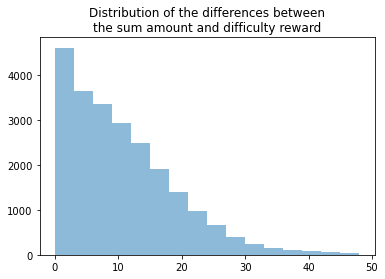

In [474]:
bins = np.arange(0, 50, 3) # fixed bin size
plt.hist(amount_difference, bins=bins, alpha=0.5)
plt.title("Distribution of the differences between\nthe sum amount and difficulty reward")

## Some analysis by completed status

### Offer type balanced

Through this grouping, we can know how well balanced is the offer received with the **completed** status:

In [477]:
print(transcript.groupby(['event', 'offer_type','offer_is_completed']).count()['person'])

event           offer_type     offer_is_completed
offer received  bogo           0                     19297
                               1                     11202
                discount       0                     17936
                               1                     12607
                informational  0                     15235
offer viewed    bogo           0                     25449
                discount       0                     21445
                informational  0                     10831
Name: person, dtype: int64


In the next table we can summarized the percentage of offers completed from the total of received ones.

|          | #Offer Received | %Completed |
|----------|-----------------|------------|
| BOGO     | 30.499          | 37%        |
| Discount | 30.543          | 41%        |

So we have an imbalanced dataset for both kind of offers.


In [496]:
#transcript.groupby(['gender','offer_is_completed']).count()['person']

### Analysis of completed offer by gender
| Gender | Completed? (1 eq yes) | Number of Offers | % to each gender |
|-------:|-----------------------|------------------|------------------|
| F      | 0                     | 102.437          | 90%              |
| F      | 1                     | 10.664           | 10%              |
| M      | 0                     | 143.861          | 92%              |
| M      | 1                     | 11.829           | 8%               |
| O      | 0                     | 3.581            | 90%              |
| O      | 1                     | 390              | 10%              |


### Analysis of completed offer by age, using histograms

The left histograms contain the distribution of completed offer by ager and in the right the non-buying option.
We can notice some distinction in the under 40 group and for those with age above of 100 (probably an age abnormalitie)

<AxesSubplot:title={'center':'Age histogram with offer not completed'}>

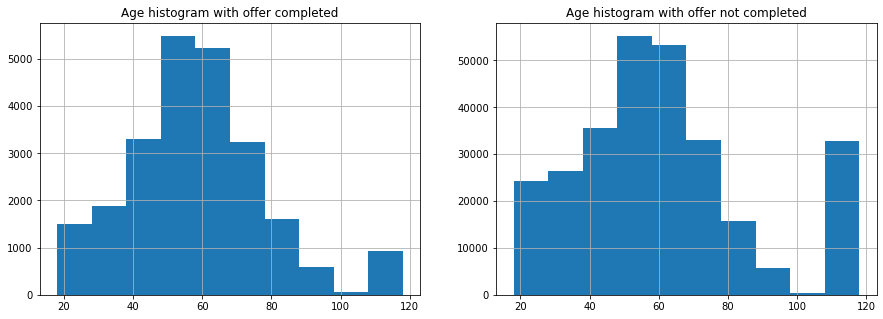

In [529]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))
axs[0].set_title('Age histogram with offer completed')
axs[1].set_title('Age histogram with offer not completed')
transcript[transcript['offer_is_completed'] == 1]['age'].hist(ax=axs[0])
transcript[transcript['offer_is_completed'] == 0]['age'].hist(ax=axs[1])

### Analysis of completed offer by income, using histograms

Comparing both histograms, we can notice a lower rate of offer completed in the incomes below 50.000. So split these information in income range could be a good option to create new variables.

<AxesSubplot:title={'center':'Income histogram with offer not completed'}>

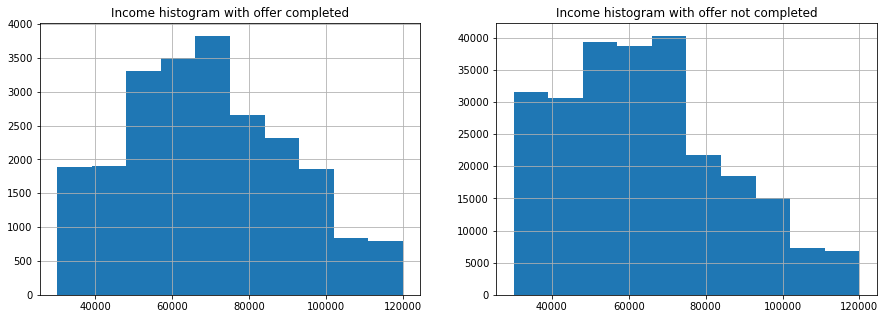

In [528]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))
axs[0].set_title('Income histogram with offer completed')
axs[1].set_title('Income histogram with offer not completed')
transcript[transcript['offer_is_completed'] == 1]['income'].hist(ax=axs[0])
transcript[transcript['offer_is_completed'] == 0]['income'].hist(ax=axs[1])

### Analysis of completed offer by Become Member date, using histograms

In the case of become member date, we can notice an increasing rate of offers not completed for those members near of 2018.

<AxesSubplot:title={'center':'Became member date histogram with offer not completed'}>

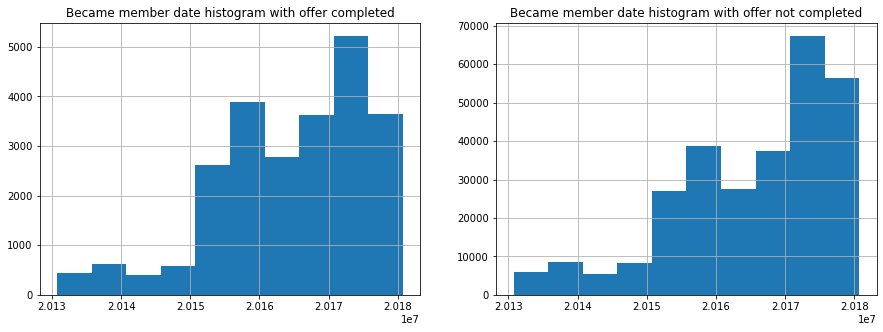

In [527]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))
axs[0].set_title('Became member date histogram with offer completed')
axs[1].set_title('Became member date histogram with offer not completed')
transcript[transcript['offer_is_completed'] == 1]['became_member_on'].hist(ax=axs[0])
transcript[transcript['offer_is_completed'] == 0]['became_member_on'].hist(ax=axs[1])